# Los Angeles Crime Dataset (2020 -- 2023)

## Importing libraries

In [18]:
# !pip install datetime
!pip install matplotlib



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from geopy.geocoders import ArcGIS
import folium
from datetime import datetime
import matplotlib.colors as mcolors

## Importing dataset:
1) Los Angeles Crime Dataset (2020 -- 2023) (https://www.kaggle.com/datasets/nathaniellybrand/los-angeles-crime-dataset-2020-present)


In [2]:
#  https://www.kaggle.com/datasets/venkatsairo4899/los-angeles-crime-data-2020-2023
df = pd.read_csv("../data/Crime_Data_from_2020_to_Present.csv", sep=",")

In [3]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752906,231510379,05/29/2023 12:00:00 AM,05/25/2023 12:00:00 AM,1100,15,N Hollywood,1548,2,662,"BUNCO, GRAND THEFT",...,IC,Invest Cont,662.0,NaN,NaN,NaN,5300 DENNY AV,NaN,34.1667,-118.3643
752907,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
752908,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
752909,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915


In [4]:
df.shape

(752911, 28)

In [5]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
752906,231510379,05/29/2023 12:00:00 AM,05/25/2023 12:00:00 AM,1100,15,N Hollywood,1548,2,662,"BUNCO, GRAND THEFT",...,IC,Invest Cont,662.0,NaN,NaN,NaN,5300 DENNY AV,NaN,34.1667,-118.3643
752907,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
752908,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
752909,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
752910,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


## Cleaning Data
- Rename column names  
- Pre-processing of string data types  
- Find geographical coordinates crimes
- Handle missing/ null values  
- Process datetime columns

In [7]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [9]:
# Changening the column names to lower case
df.columns = df.columns.str.lower()

# Changening columns names
df = df.rename(columns={
    'date rptd': 'reported_date',
    'date occ' : 'crime_date',
    'time occ' : 'crime_time',
    'area' : 'area_numerically',
    'area name' : 'area_name',
    'rpt dist no' : 'district',
    'crm cd' : 'crime_code',
    'crm cd desc' : 'crime_code',
    'vict age' : 'victim_age',
    'vict sex' : 'victim_gender',
    'vict descent' : 'victim_decscent',
    'premis cd' : 'premis_code',
    'premis desc' : 'premis_description',
    'weapon used cd' : 'weapon_code',
    'weapon desc' : 'weapon_description',
    'status desc' : 'status_description',
    'crm cd 1' : 'crime_code_1',
    'crm cd 2' : 'crime_code_2',
    'crm cd 3' : 'crime_code_3',
    'crm cd 4' : 'crime_code_4',
    'cross street' : 'cross_street',
    'lat' : 'latitude',
    'lon' : 'longitude'})

## Handling missing values

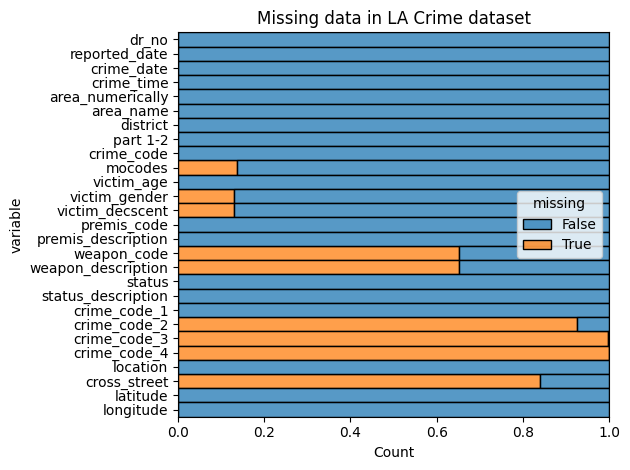

In [10]:
#Plots in a single line

# Ploting the missing data in the trips dataset
sns.histplot(data=df.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill")

ylabels = ("Variable")
xlabels = ("Count")

# Set the title for the plot
plt.title("Missing data in LA Crime dataset")

# Save the figure on Windows
# if os.path.exists(parent_folder + "\\Figures"):
#     plt.savefig(parent_folder + "\\Figures\\Missing_data_in_datasets.png")
# else:
#     os.mkdir(parent_folder + "\Figures")
#     plt.savefig(parent_folder + "\\Figures\\Missing_data_in_datasets.png")

# # Save the figure on Mac/Linux
# curr_dir = os.getcwd()
# parent_folder = dirname(curr_dir) 
# if os.path.exists(parent_folder + "/Figures"):
#     plt.savefig(parent_folder + "/Figures/Missing_data_in_datasets.png")
# else:
#     os.mkdir(parent_folder + "/Figures")
#     plt.savefig(parent_folder + "/Figures/Missing_data_in_datasets.png")

plt.tight_layout()
plt.show()


In [11]:
df.columns

Index(['dr_no', 'reported_date', 'crime_date', 'crime_time',
       'area_numerically', 'area_name', 'district', 'part 1-2', 'crime_code',
       'crime_code', 'mocodes', 'victim_age', 'victim_gender',
       'victim_decscent', 'premis_code', 'premis_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')

In [12]:
# Drop columns that are not needed or have too many missing values
df = df.drop(columns=['mocodes'])
df = df.drop(columns=['crime_code_3'])
df = df.drop(columns=['crime_code_4'])

# Fill missing values with 0 or 'Unknown'
df['victim_gender'] = df['victim_gender'].fillna('Unknown')
df['victim_decscent'] = df['victim_decscent'].fillna('Unknown')
df['cross_street'] = df['cross_street'].fillna('0')
df['crime_code_2'] = df['crime_code_2'].fillna('0')

## Remove duplicates

In [13]:
# Remove duplicates in trips dataset
df.drop_duplicates(inplace=True)

## Find geographical coordinates of the LA Crime places

Using ArcGIS, a web-based mapping software, we can input the given address of the crime from the dataset and get the full address, longtitude and latitude.
With this information, we can create visuals to see location of crime.

We will create three new columns:

    - full_adresss
    - longitude
    - latitude

Not all the addresses generated were accurate so these had to be changed manually.

In [14]:
df[['location', 'latitude', 'longitude']]

,location,latitude,longitude
0,1100 W 39TH PL,34.0141,-118.2978
1,700 S HILL ST,34.0459,-118.2545
2,200 E 6TH ST,34.0448,-118.2474
3,5400 CORTEEN PL,34.1685,-118.4019
4,14400 TITUS ST,34.2198,-118.4468
...,...,...,...
752906,5300 DENNY AV,34.1667,-118.3643
752907,12500 BRANFORD ST,34.2466,-118.4054
752908,12800 FILMORE ST,34.2790,-118.4116
752909,6100 S VERMONT AV,33.9841,-118.2915


In [15]:
# #Add 'Austin Texas' to give more information
df['location'] = df['location'] + ' Los Angeles' 

# Initiate ArcGIS
nom = ArcGIS()

# # Create column that gets address, latitude and longitude
# df['coordinates']=df['location'].apply(nom.geocode)

#extract coordinates and store it in lat and lon columns
# df['location']=df['coordinates'].apply(lambda x:x.location)
# df['latitude']=df['coordinates'].apply(lambda x:x.latitude)
# df['longitude']=df['coordinates'].apply(lambda x:x.longitude)

# Not all rows were successfully matched, find rows where location was not found to be Austin and change manually
# station_id 2546, 2566, 2537 are incorrect.

# df[~df['full_address'].str.contains('Austin')] 

# Manually change data for station_id 2546, 2566, 2537 based on long and lat on Google Maps
# df.loc[df['station_id'] == 2546, ['full_address', 'lat', 'lon']]  = ['1231 W Ave, Austin, Texas, 78701', 30.276460, -97.748220]

# df.loc[stations_df['station_id'] == 2566, ['full_address', 'lat', 'lon']]  = ['W 2nd St, Austin, Texas, 78701', 30.264320, -97.744490]

# df.loc[stations_df['station_id'] == 2537, ['full_address', 'lat', 'lon']]  = ['603 W Ave, Austin, Texas, 78701', 30.270678, -97.750389]

## Process datetime columns:

    - Removing time stamp from date columns
    - Searching for day of the week from date
    - Spliting date columns for D, M, Y
    - Processing the crime_time column into time format

In [40]:
# Removing time stamp from columns 'reported_date', 'cirme_date'
# df['reported_date'] = df['reported_date'].apply(lambda x: x.split(' ')[0])
# df['crime_date'] = df['crime_date'].apply(lambda x: x.split(' ')[0])

# Extracting the day of the week from the date
df['reported_day_of_week'] = pd.to_datetime(df['reported_date'])
df['reported_day_of_week'] = df['reported_day_of_week'].dt.day_name()

df['crime_day_of_week'] = pd.to_datetime(df['crime_date'])
df['crime_day_of_week'] = df['crime_day_of_week'].dt.day_name()

# Extracting the day/month/year from the date
df['reported_date'] = pd.to_datetime(df['reported_date'])
df['reported_day_day'] = df['reported_date'].dt.day
df['reported_day_month'] = df['reported_date'].dt.month
df['reported_day_year'] = df['reported_date'].dt.year

df['crime_date'] = pd.to_datetime(df['crime_date'])
df['crime_day_day'] = df['crime_date'].dt.day
df['crime_day_month'] = df['crime_date'].dt.month
df['crime_day_year'] = df['crime_date'].dt.year

# Calculating the difference between the crime date and the reported date in days
df['date_diff'] = df['reported_date'] - df['crime_date']

#Processing the crime_time column
df['crime_time'] = df['crime_time'].str.zfill(4)
df = df.assign(crime_newtime=pd.to_datetime(df.crime_time, format='%H%M').dt.strftime('%H:%M'))

## Save cleaned data as new csv files

In [43]:
df.to_csv("../data/cleaned_df.csv", index = False)